# Training a CNN classifier on CIFAR-10
* We will do the following steps in order.
    1. Load and normalizing the CIFAR10 training and test datasets using torchvision
    2. Define a Convolutional Neural Network
    3. Define a loss function
    4. Train the network on the training data
    5. Test the network on the test data

### Load and normalizing the CIFA10 training and test datasets using torchvision

In [ ]:
# Loading and normalizing CIFAR-10
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(0)
np.random.seed(0)

In [3]:
use_cuda = True
if use_cuda and torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
print(device)

cuda:0


In [2]:
# The output of torchvision datasets are PILImage images of range [0,1].
# Transform them th Tensors of normalized range [-1, 1]

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # normalize

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')


100.0%

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


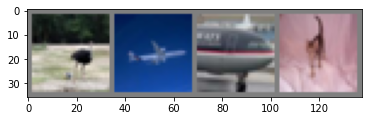

bird, plane, plane, cat, 


In [17]:
# display some images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(''.join('%s, ' % classes[labels[j]] for j in range(4)))

### Define a Convolutional Neural Network
* Network Model
    1. Convolution - input channel: 3, output channel: 6, kernel_size: 5
    2. Maxpoling   - size: 2, stride: 2
    3. Convolution - input channel: 6, output channel: 16, kernel_size: 5
    4. Maxpoling   - size: 2, stride: 2
    5. Fully connected layer - in_features: 400, out_features: 120
    6. Fully connected layer - in_features: 120, out_features: 84
    7. Fully connected layer - in_features: 84, out_features: 10
    
* Note: Apply ReLU activation function for hidden layers.

In [18]:
# Define a Convolutional Neural Network

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # TODO: Fill this function
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)
        
    def forward(self, x):
        # TODO: Fill this function
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        

net = Net().to(device)

# Test case #1
# - check the default output of model before training
# - make sure that the definition of layers in your model is correct.

net(images.to(device))
print('Target:')
s = """Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)"""
print(s)
print('Actual:')
print(str(net))
assert str(net) == s

Target:
Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
Actual:
Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### Define a Loss function and optimizer
* Use Classification Cross-Entropy loss
* Use SGD with learning rate 0.0001 and momentum 0.9

In [19]:
import torch.optim as optim

# TODO: define a loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Train the network on the training data

In [20]:
### Train the network
print('Start Training ')
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # TODO: Fill this loop
        
        # get the inputs
        inputs, labels = data[0].to(device), data[1].to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:
            print('[%d, %5d] loss: %.3f' %
                 (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training')

Start Training 
[1,   500] loss: 2.304
[1,  1000] loss: 2.296
[1,  1500] loss: 2.238
[1,  2000] loss: 2.092
[1,  2500] loss: 2.002
[1,  3000] loss: 1.932
[1,  3500] loss: 1.905
[1,  4000] loss: 1.804
[1,  4500] loss: 1.776
[1,  5000] loss: 1.715
[1,  5500] loss: 1.735
[1,  6000] loss: 1.631
[1,  6500] loss: 1.635
[1,  7000] loss: 1.616
[1,  7500] loss: 1.581
[1,  8000] loss: 1.561
[1,  8500] loss: 1.566
[1,  9000] loss: 1.547
[1,  9500] loss: 1.540
[1, 10000] loss: 1.539
[1, 10500] loss: 1.519
[1, 11000] loss: 1.481
[1, 11500] loss: 1.431
[1, 12000] loss: 1.493
[1, 12500] loss: 1.463
[2,   500] loss: 1.413
[2,  1000] loss: 1.430
[2,  1500] loss: 1.449
[2,  2000] loss: 1.434
[2,  2500] loss: 1.443
[2,  3000] loss: 1.413
[2,  3500] loss: 1.387
[2,  4000] loss: 1.420
[2,  4500] loss: 1.423
[2,  5000] loss: 1.380
[2,  5500] loss: 1.387
[2,  6000] loss: 1.348
[2,  6500] loss: 1.392
[2,  7000] loss: 1.383
[2,  7500] loss: 1.342
[2,  8000] loss: 1.342
[2,  8500] loss: 1.376
[2,  9000] loss: 1

### Test the network on the test data

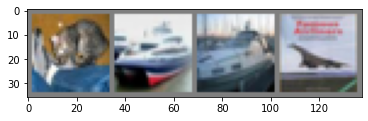

GrondTruth:    cat  ship  ship plane


In [21]:
dataiter = iter(testloader)
images, labels = dataiter.next()

#print images
imshow(torchvision.utils.make_grid(images))
print('GrondTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [22]:
outputs = net(images.to(device))

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

# Test case 2
# - check the predicted output of model after training
# - make sure that the optimizer and its options are correctly defined.

Predicted:    cat  ship   car  ship


In [23]:
# Let us look at how the network performs on the whole dataset

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


In [24]:
class_correct = [0.0] * 10
class_total = [0.0] * 10
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 43 %
Accuracy of   car : 57 %
Accuracy of  bird : 35 %
Accuracy of   cat : 35 %
Accuracy of  deer : 52 %
Accuracy of   dog : 35 %
Accuracy of  frog : 62 %
Accuracy of horse : 67 %
Accuracy of  ship : 76 %
Accuracy of truck : 66 %
